In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
#Rename the columns so they follow the PE8 (snake case).
##customer_df.columns

In [7]:
#lowercase
customer_df.columns = customer_df.columns.str.lower()  

In [8]:
#underscore
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [9]:
#after
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
#Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors ='coerce')
print(customer_df)


# plz ignore
# customer_df.style.format({"effective_to_date": lambda t: t.strftime("%d/%m/%Y")})
# print (customer_df)

#my_date = datetime.strptime(my_string, "%Y-%m-%d")


# def change_date_format(dt):
#         return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', '\\3-\\2-\\1', dt)


     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor        2011-02-24         Employed 

In [11]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [12]:
#numericals
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
numericals.shape

(9134, 8)

In [14]:
#Check NaN values per column.
#did this at the beginning, got zero nan for everything
#customer_df.isnull().sum()/len(customer_df)

In [34]:
#Define a function that differentiates between continuous and discrete variables. 
#Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
#https://keydifferences.com/difference-between-discrete-and-continuous-variable.html

# def is_discrete(customer_df):
#     for col in customer_df.columns:
#         if len(customer_df[col].unique())<=10:
#             print(col,len(customer_df[col].unique()))
#     return(customer_df)

# is_discrete(customer_df)

def define_variable(df, unique_value_max=10):           #Andy created this code
    categoricals = []
    num_continuous = []
    num_descrete = []
    for c in df.columns:
        if df[c].dtype == object:
            #print(c + " categorical")
            categoricals.append(c)
        else:
            if df[c].nunique() > unique_value_max:
                #print(c + " numerical - continuous")
                num_continuous.append(c)
            else:
                #print(c + " numerical - descrete")
                num_descrete.append(c)
        # maybe print the return order for added clarity on how to use function
        # is this going to throw a fit if we dont append anything to one of the vars...checked by passing back one of the split out dfs
    return df[categoricals], df[num_continuous], df[num_descrete]
cat_features, num_continuous_features, num_descrete_features = define_variable(customer_df)
cat_features2, num_continuous_features2, num_descrete_features2 = define_variable(cat_features) # check if this breaks function...
display(cat_features.head())
num_continuous_features = num_continuous_features.drop('effective_to_date',axis=1)    
print(num_continuous_features.shape)

display(num_continuous_features)
display(num_descrete_features)



# def find_my_cat(numericals):
#      for col in customer_df.columns:
#          discrete_var = [key for key in dict(numericals.dtypes)
#              if dict(numericals.dtypes)[key] in ['int32','int64']]  
#          continuous_var = [key for key in dict(numericals.dtypes)
#              if dict(numericals.dtypes)[key] in ['float64','float32'] ]   
#      return(discrete_var,continuous_var)
    
# display(find_my_cat(numericals))

# def is_unique(numericals):
#     for col in numericals.columns:
#         if len(numericals[col].unique())<=10:
#             print(col,(numericals[col].unique()))
#     return(numericals)

# display(is_unique(numericals))


#this code works
# continuous_var = customer_df._get_numeric_data().columns
# display(continuous_var)
# discrete_var = list(set(customer_df.columns) - set(continuous_var))
# categorical_var


# continuous_var = [key for key in dict(customer_df.dtypes)
#                    if dict(customer_df.dtypes)[key]
#                        in ['float64','float32','int32','int64']] # Numeric Variable

# discrete_var = [key for key in dict(customer_df.dtypes)
#              if dict(customer_df.dtypes)[key] in ['object'] ] # Categorical Varible

# display(continuous_var)
# discrete_var

#interesting  this might be the correct way
# def is_discrete(customer_df):
#     for col in customer_df.columns:
#         if len(customer_df[col].unique())<=10:
#             print(col,len(customer_df[col].unique()))
#     return(customer_df)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 6)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


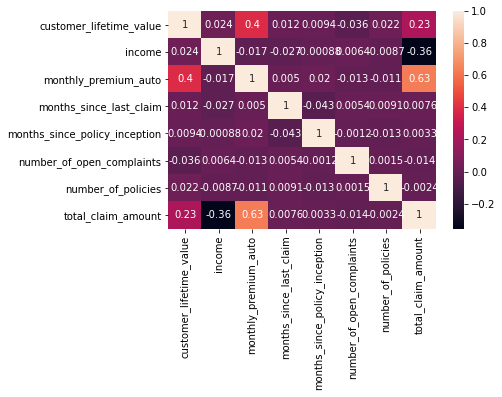

In [35]:
#matrix
corrMatrix = numericals.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

C:\Users\eddie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


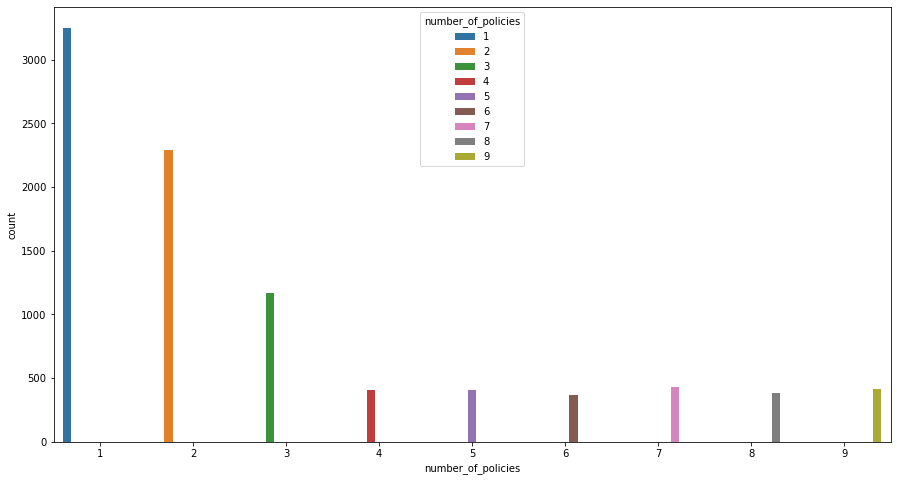

In [36]:
plt.figure(figsize=(15,8))
sns.countplot('number_of_policies', hue='number_of_policies', data=num_descrete_features)
plt.show()


In [37]:
display(numericals['number_of_open_complaints'].value_counts(dropna=False))
display(numericals['number_of_policies'].value_counts(dropna=False))

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [38]:
#For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
#Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

# categoricals = customer_df.select_dtypes(object)
cat_features.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [39]:
cat_features.shape

(9134, 15)

In [40]:
# #following the lab directions...
# def is_unique(categoricals):
#     for col in categoricals.columns:
#         if len(categoricals[col].unique())<=10:
#             print(col,(categoricals[col].unique()))
#     return(categoricals)

# is_unique(categoricals)

In [41]:

cat_features = cat_features.drop('customer',axis=1)    
print(cat_features.shape)
cat_features.head()

(9134, 14)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


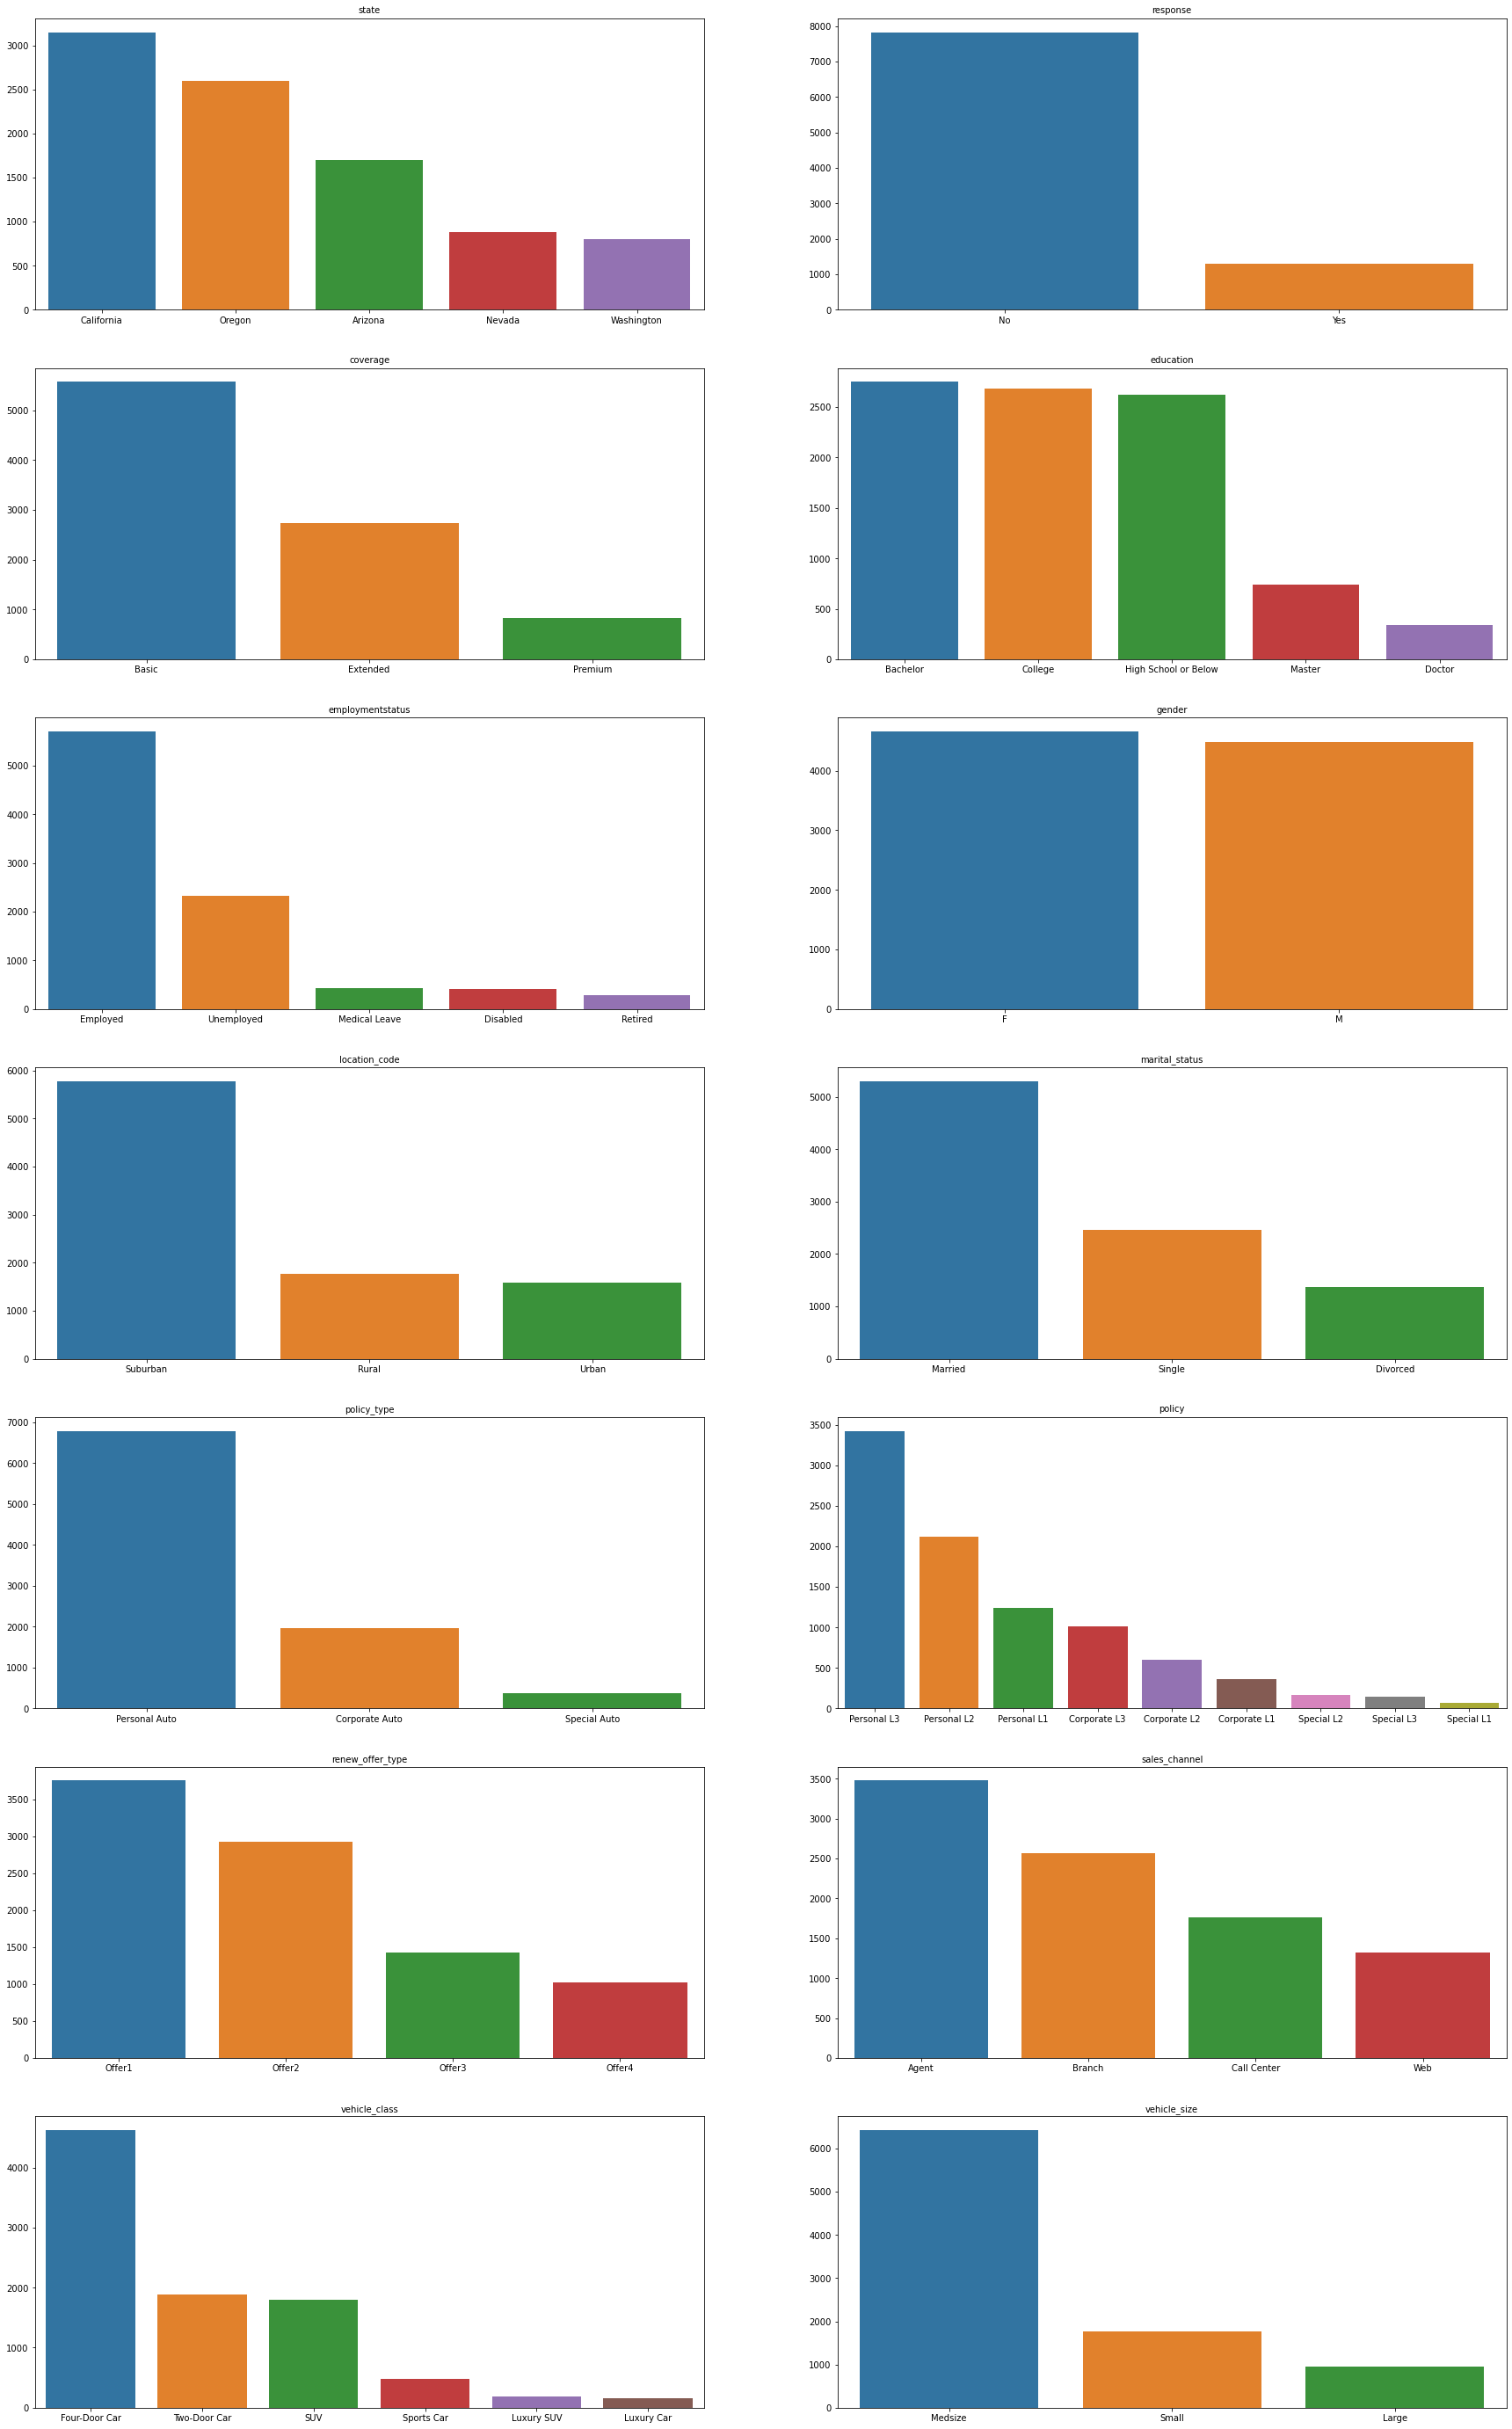

In [42]:
f, axes = plt.subplots(int(cat_features.shape[1]/2),2, figsize =(30,50))
for i, col in enumerate(cat_features):
    sns.barplot(x = cat_features[col].value_counts().index,
                y = cat_features[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
    axes[int(i/2)][int(i)%2].set_title(col,fontsize = 10)
    axes[int(i/2)][int(i)%2].set_ylabel('')
    

In [43]:
def clean_employmentstatus(x):
    if x in ['Medical Leave','Disabled', 'Retired']:
        return 'Other'
    else:
        return x

In [44]:
cat_features['employmentstatus'] = cat_features['employmentstatus'].apply(clean_employmentstatus)

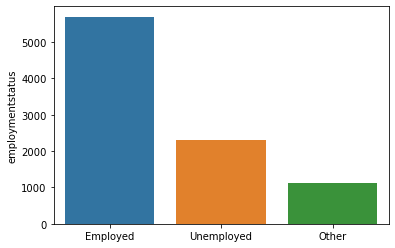

In [45]:
sns.barplot(x=cat_features['employmentstatus'].value_counts().index, y=cat_features['employmentstatus'].value_counts());

In [46]:
def clean_education(x):
    if x in ['Master','Doctor']:
        return 'Higher Education'
    else:
        return x

In [47]:
cat_features['education'] = cat_features['education'].apply(clean_education)

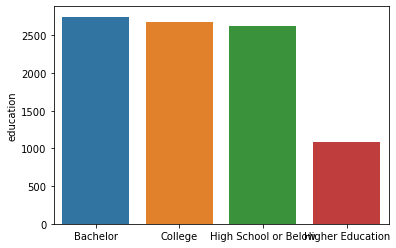

In [48]:
sns.barplot(x=cat_features['education'].value_counts().index, y=cat_features['education'].value_counts());

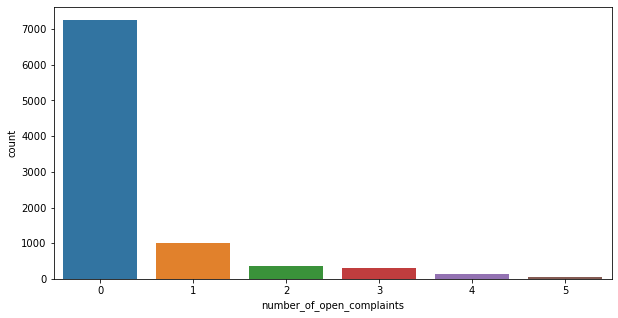

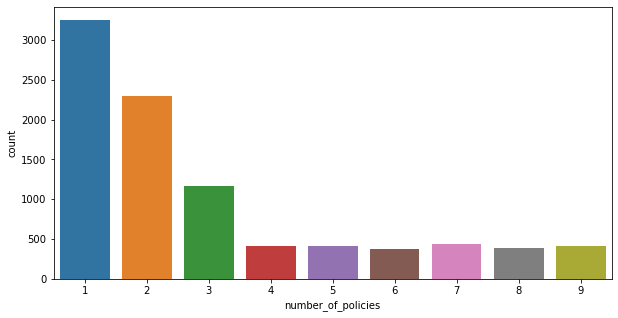

In [77]:
#discrete
for col in num_descrete_features.columns :    
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, data=num_descrete_features)
    plt.show()


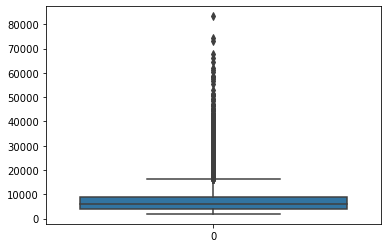

customer_lifetime_value


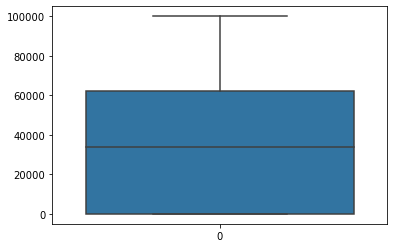

income


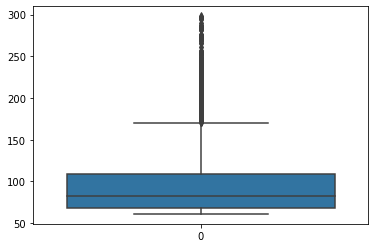

monthly_premium_auto


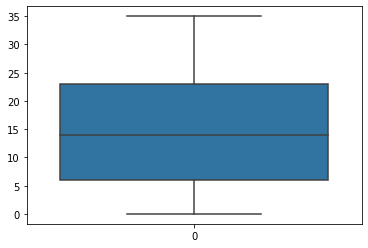

months_since_last_claim


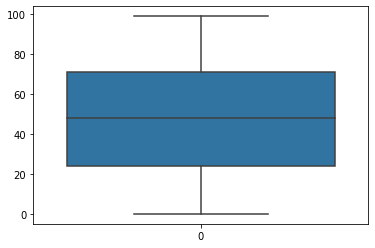

months_since_policy_inception


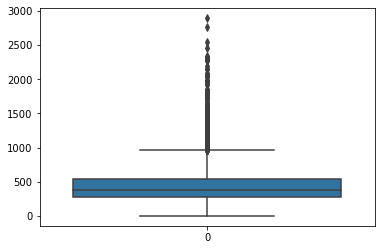

total_claim_amount


In [51]:
#continuous
for col in  num_continuous_features.columns :
    sns.boxplot(data = num_continuous_features[col])
    plt.show() 
    print(col)

14183.332008125


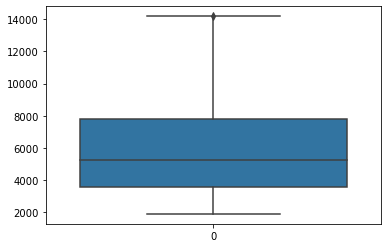

customer_lifetime_value


In [75]:
# customer_lifetime_value
iqr = np.percentile(num_continuous_features['customer_lifetime_value'],75) - np.percentile(num_continuous_features['customer_lifetime_value'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['customer_lifetime_value'],75) + 1.5*iqr      #upper limit is 16414
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['customer_lifetime_value'] < upper_limit]        

sns.boxplot(data = num_continuous_features['customer_lifetime_value'])
plt.show() 
print('customer_lifetime_value')

155.5


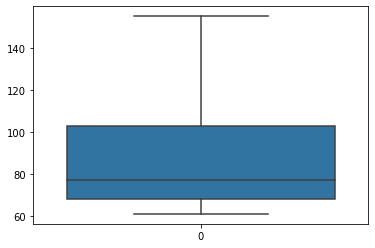

monthly_premium_auto


In [74]:
# monthly_premium_auto
iqr = np.percentile(num_continuous_features['monthly_premium_auto'],75) - np.percentile(num_continuous_features['monthly_premium_auto'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['monthly_premium_auto'],75) + 1.5*iqr      #upper limit is 165
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['monthly_premium_auto'] < upper_limit] 

sns.boxplot(data = num_continuous_features['monthly_premium_auto'])
plt.show() 
print('monthly_premium_auto')

899.8362585


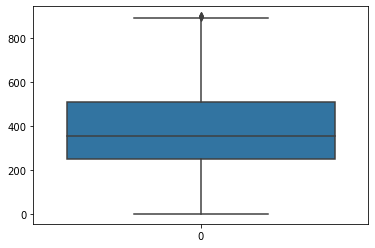

total_claim_amount


In [76]:
# total_claim_amount
iqr = np.percentile(num_continuous_features['total_claim_amount'],75) - np.percentile(num_continuous_features['total_claim_amount'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['total_claim_amount'],75) + 1.5*iqr      #upper limit is 923
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['total_claim_amount'] < upper_limit] 

sns.boxplot(data = num_continuous_features['total_claim_amount'])
plt.show() 
print('total_claim_amount')

<AxesSubplot:>

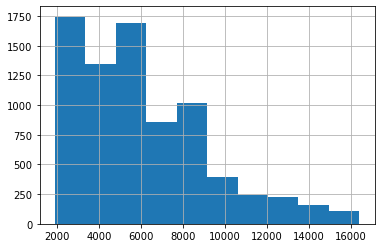

In [67]:
num_continuous_features['customer_lifetime_value'].hist()

<AxesSubplot:>

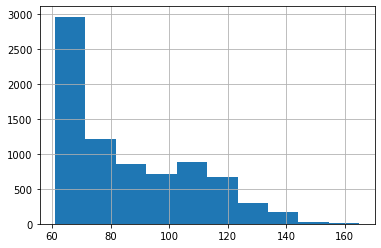

In [68]:
num_continuous_features['monthly_premium_auto'].hist()

<AxesSubplot:>

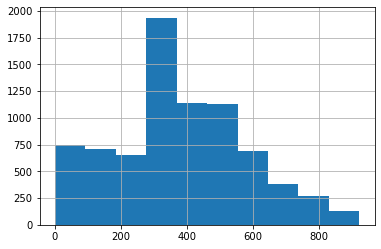

In [69]:
num_continuous_features['total_claim_amount'].hist()